In [1]:
from brian2 import *
%matplotlib inline

In [13]:
Ttheta = 120*ms
s=1
sigma_w=1

dp = lambda tdiff: (tdiff)*2*pi/Ttheta
H = lambda dp,w:  2*pi/(Ttheta/ms) * w * exp(s*cos(dp)) * (cos(dp) - s*sin(dp)**2 )

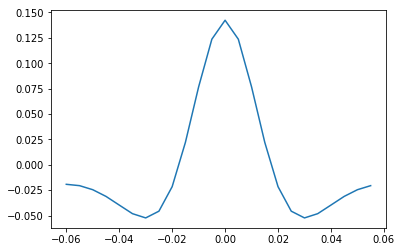

In [24]:
tdiff = arange(-Ttheta/2,Ttheta/2,5*ms)
plot(tdiff,[H(dp(t),1) for t in tdiff])

In [ ]:
N=2
tau = 5*ms

eqs_x = '''
wx : 1
dx/dt =  (-k*sin(x) + wx) / tau : 1
'''

eqs_syn = '''
xj: 1
w: 1
'''

G = NeuronGroup(N,model=eqs_x,threshold="(x+2*pi*t/Ttheta)%(2*pi)<6e-5")
S = Synapses(G,G,model=eqs_syn,on_pre='''
xj = x_pre
wx = w/sigma_w**2 * H(dp())
''')

In [32]:
Synapses?